In this project, we aim to predict whether a bank customer will default on a loan or successfully repay it. Loan default prediction is a critical problem in the financial sector, as it helps banks and financial institutions manage risk and make more informed lending decisions.

The dataset used in this study contains demographic and financial information about loan applicants. Based on these features, we build a supervised machine learning model to classify customers into two categories: those who are likely to repay their loans and those who are at risk of default.

Since the target variable represents two possible outcomes (default or non-default), this project is a binary classification problem. Throughout the project, we perform exploratory data analysis (EDA), feature engineering, data preprocessing, and model comparison to develop an effective prediction system.

### Dataset Data Dictionary

| Name | Data Type | Description |
| :--- | :--- | :--- |
| **Age** | Integer | Age of the borrower |
| **Income** | Integer | Annual income of the borrower |
| **LoanAmount** | Integer | Total amount of money borrowed |
| **CreditScore** | Integer | Creditworthiness score |
| **MonthsEmployed** | Integer | Duration of employment in months |
| **NumCreditLines** | Integer | Number of open credit lines |
| **InterestRate** | Float | Interest rate for the loan |
| **LoanTerm** | Integer | Length of the loan in months |
| **DTIRatio** | Float | Debt-to-Income ratio |
| **Education** | String | Highest education level (PhD, Master, etc.) |
| **EmploymentType** | String | Current employment status (Full-time, etc.) |
| **MaritalStatus** | String | Marital status (Single, Married, Divorced) |
| **HasMortgage** | String | Presence of an existing mortgage (Yes/No) |
| **HasDependents** | String | Presence of dependents (Yes/No) |
| **LoanPurpose** | String | Reason for the loan (Home, Auto, Business, etc.) |
| **HasCoSigner** | String | Presence of a loan co-signer (Yes/No) |
| **Default (Target)** | Integer | Loan default status (1: Defaulted, 0: Paid) |

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Loan_default.csv')

In [4]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
df = df.drop("LoanID",axis=1)

In [6]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [7]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [8]:
df.isnull().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0
Education,0


In [9]:
df["Default"].value_counts()

,count
Default,
0,225694
1,29653


In [10]:
df.corr(numeric_only=True)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


In [11]:
# EDA
import math
def plot_all_histograms(df,title_prefix = ""):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(numeric_cols)/n_cols)

    plt.figure(figsize=(5*n_cols,4*n_rows))

    for i, col in enumerate(numeric_cols,1):
      plt.subplot(n_rows,n_cols,i)
      sns.histplot(df[col],kde=True,bins=30)
      plt.title(f"{title_prefix} {col}")
      plt.xlabel("")
      plt.ylabel("")

    plt.tight_layout()
    plt.show()

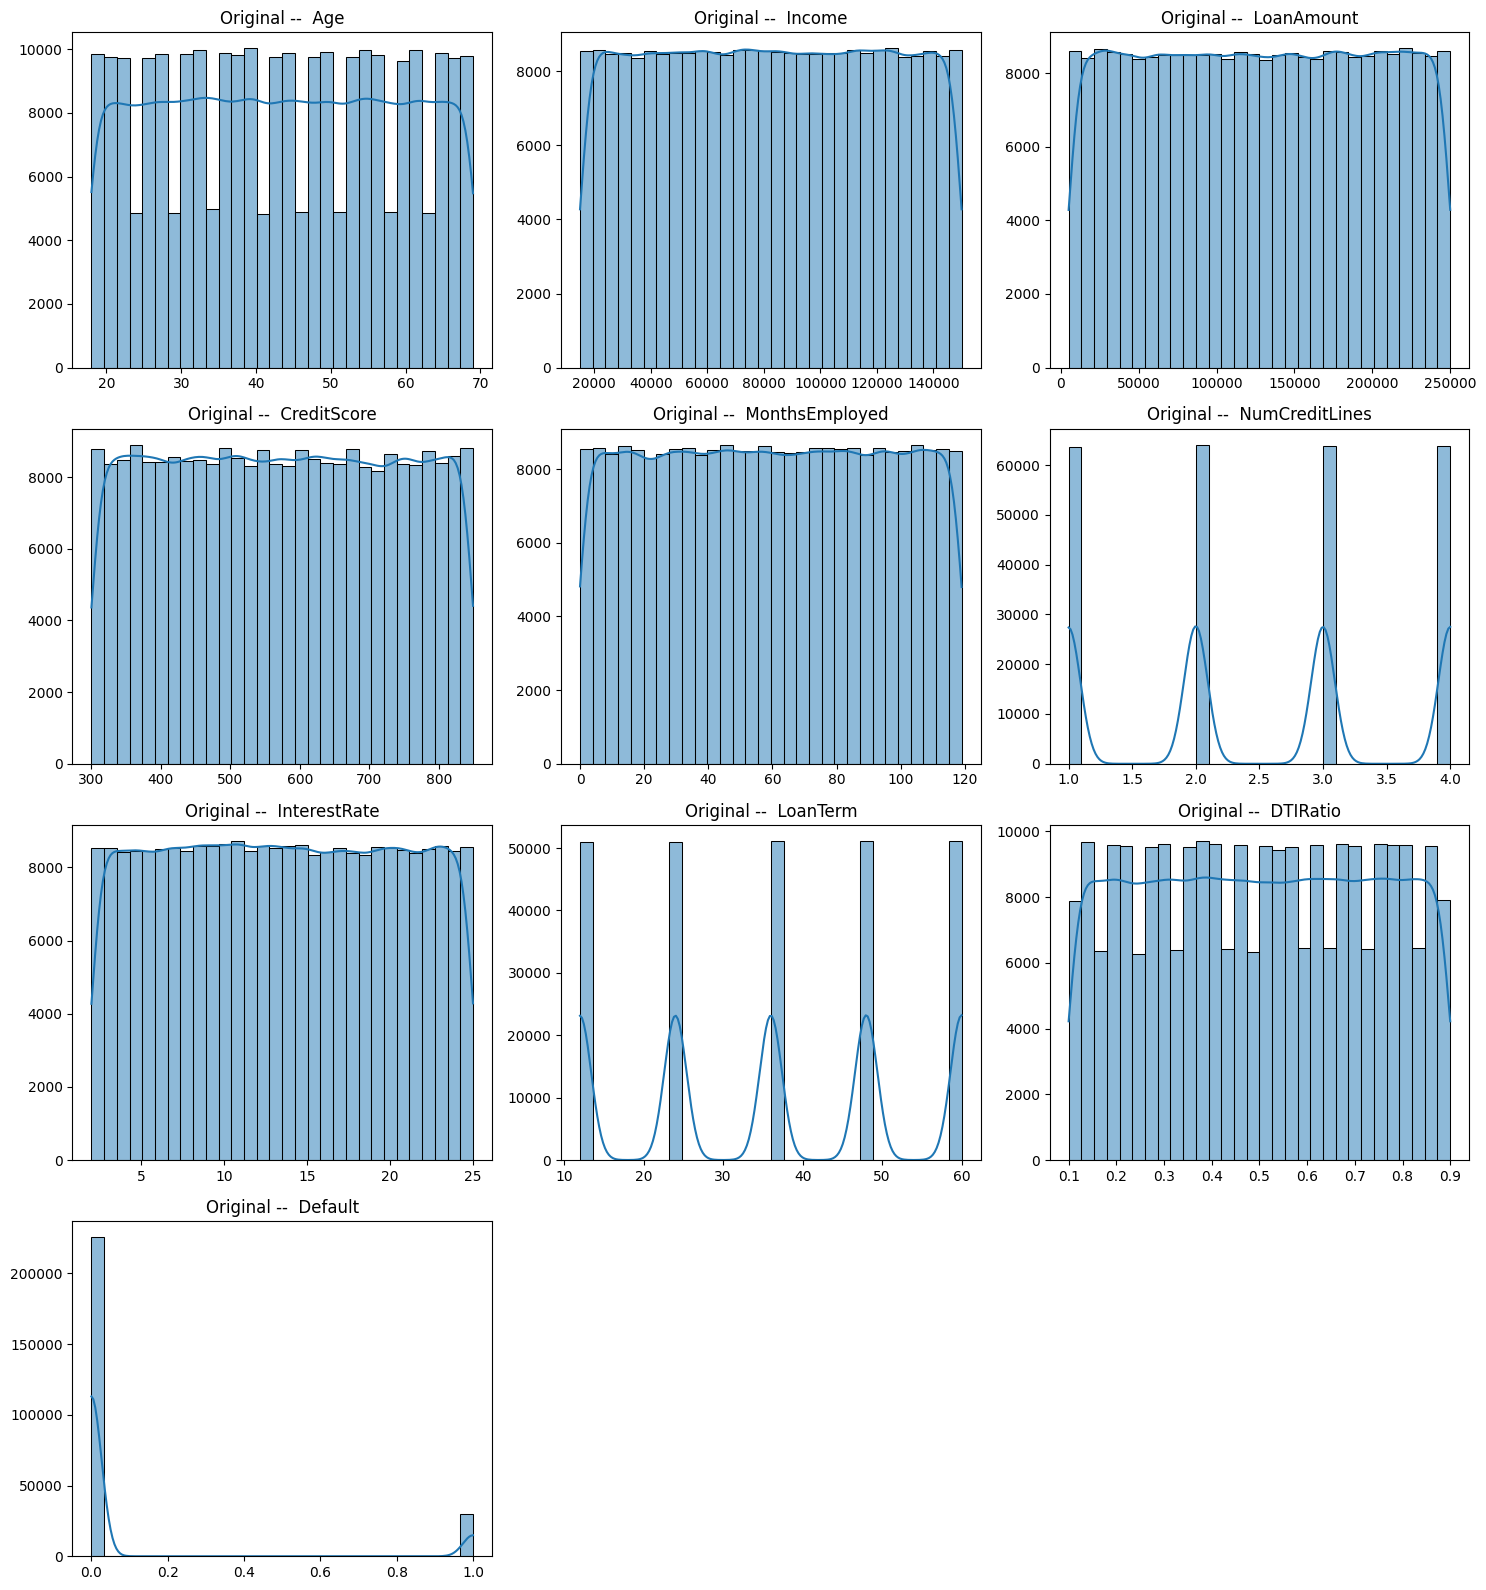

In [12]:
plot_all_histograms(df,title_prefix="Original -- ")

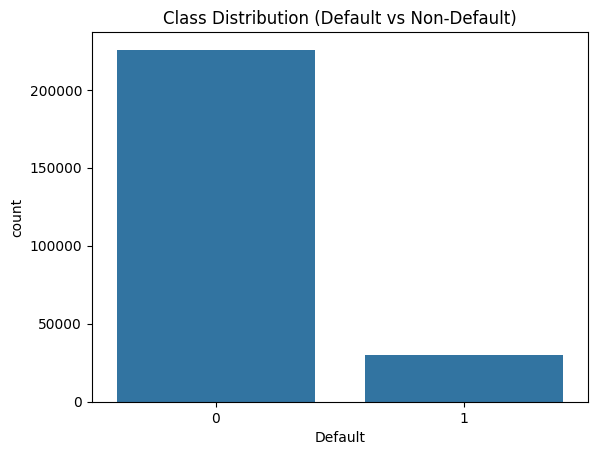

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64


In [13]:
sns.countplot(x="Default", data=df)
plt.title("Class Distribution (Default vs Non-Default)")
plt.show()

print(df["Default"].value_counts(normalize=True))

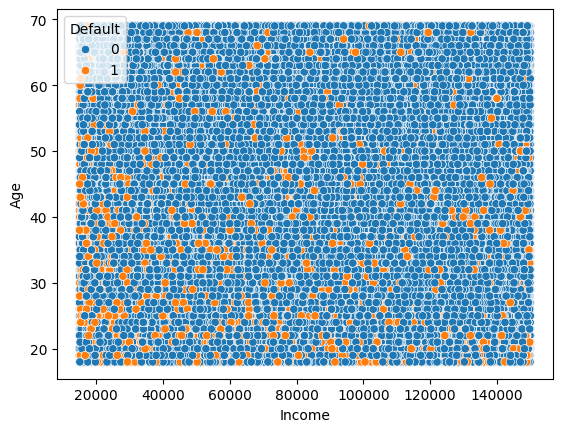

In [14]:
sns.scatterplot(data=df,x="Income",y="Age",hue="Default")
plt.show()

In [15]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [17]:
cat_cols = ["Education","EmploymentType","MaritalStatus","HasMortgage","HasDependents","LoanPurpose","HasCoSigner"]
num_cols = ["Age","Income","LoanAmount","CreditScore","MonthsEmployed","NumCreditLines","InterestRate","LoanTerm","DTIRatio","Default"]

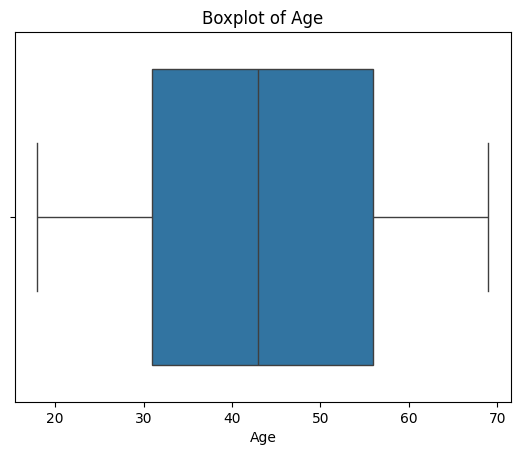

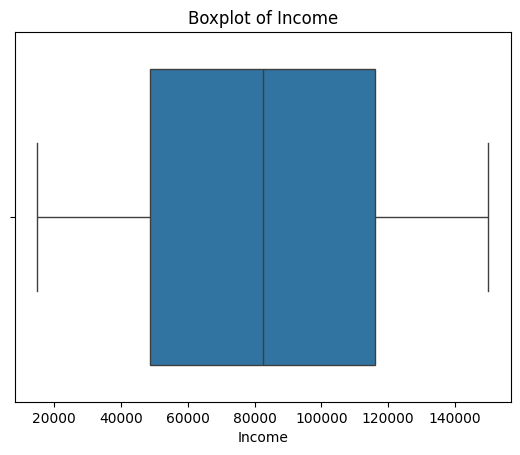

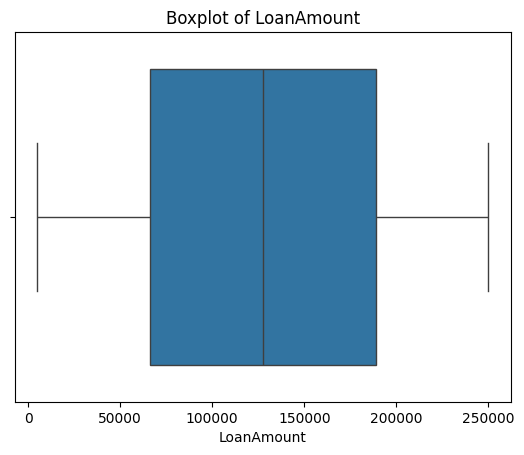

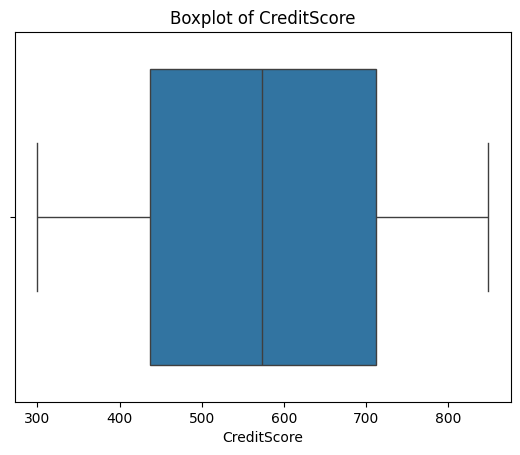

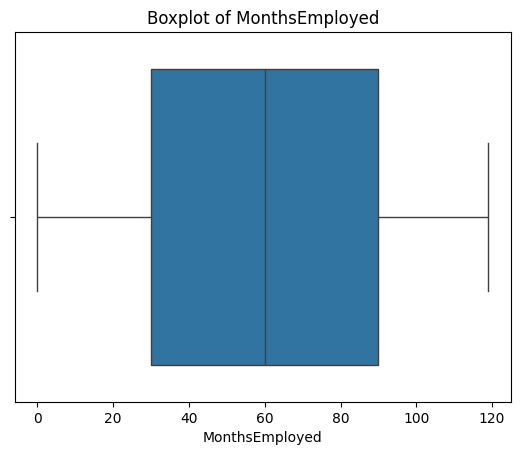

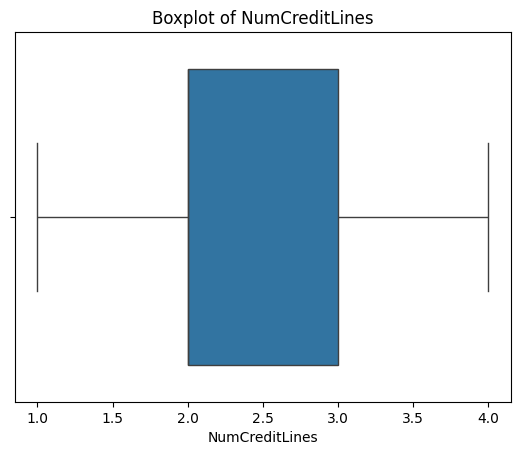

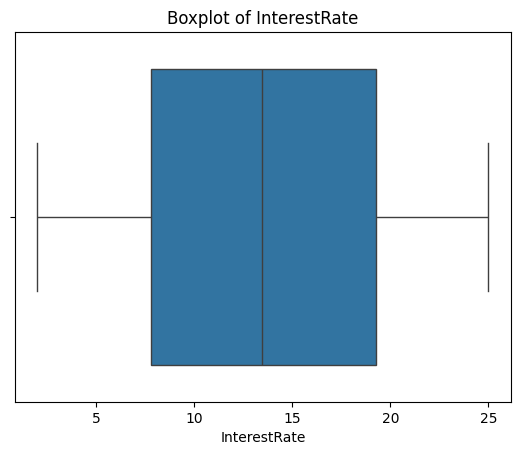

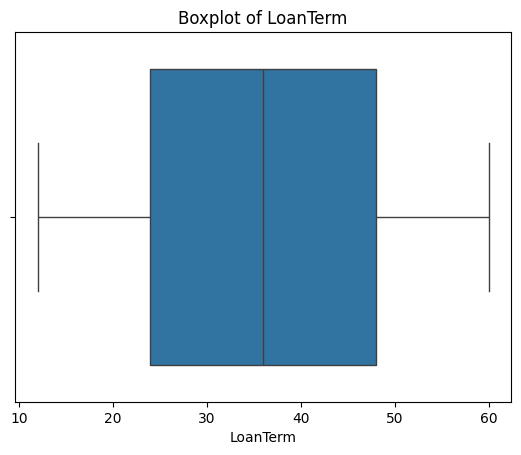

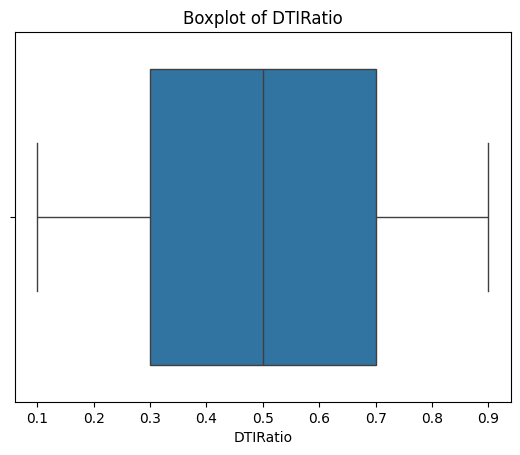

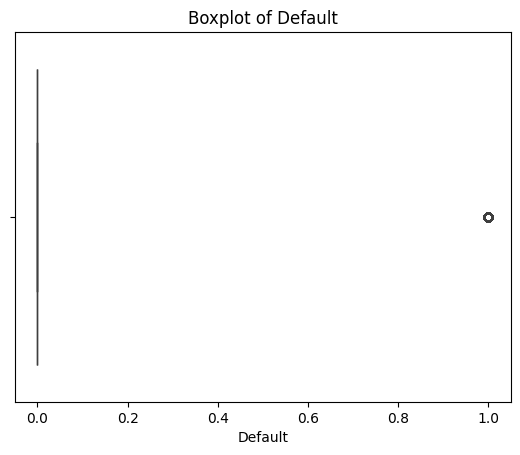

In [18]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

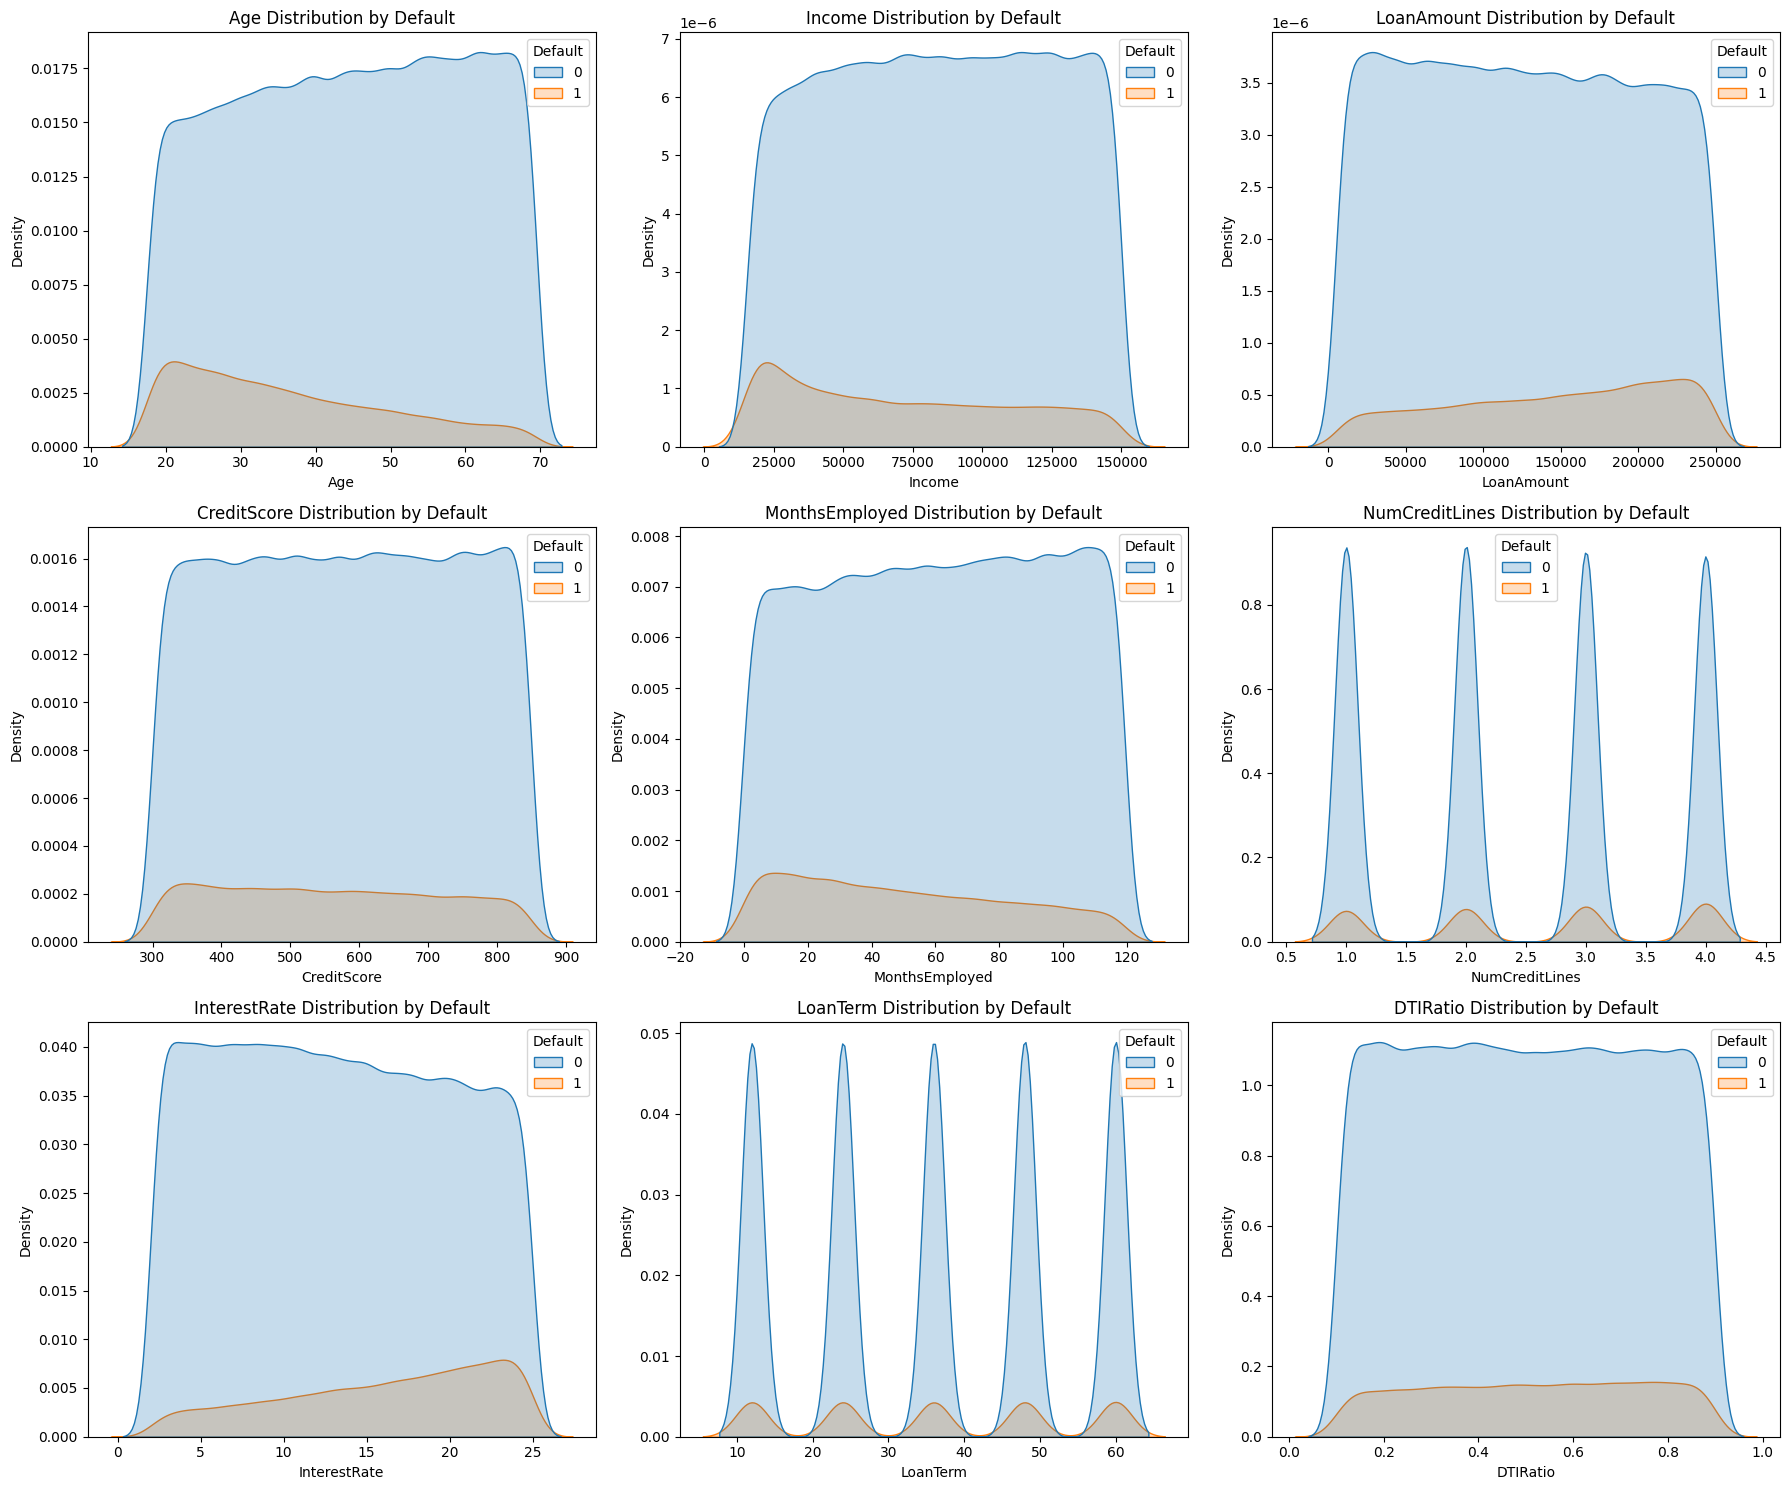

In [19]:
num_cols = df.select_dtypes(include=np.number).columns.drop("Default")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df, x=col, hue="Default", fill=True, ax=axes[i])
    axes[i].set_title(f"{col} Distribution by Default")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [20]:
for col in cat_cols:
    uniques = df[col].unique()
    print(f"{col} column {len(uniques)} different values includes:")

    for val in uniques:
        print("   ", val)

    print("-------------------")

Education column 4 different values includes:
    Bachelor's
    Master's
    High School
    PhD
-------------------
EmploymentType column 4 different values includes:
    Full-time
    Unemployed
    Self-employed
    Part-time
-------------------
MaritalStatus column 3 different values includes:
    Divorced
    Married
    Single
-------------------
HasMortgage column 2 different values includes:
    Yes
    No
-------------------
HasDependents column 2 different values includes:
    Yes
    No
-------------------
LoanPurpose column 5 different values includes:
    Other
    Auto
    Business
    Home
    Education
-------------------
HasCoSigner column 2 different values includes:
    Yes
    No
-------------------


In [21]:
# train-test-split

In [22]:
binary_columns = ["HasMortgage","HasDependents","HasCoSigner"]
binary_map = {"Yes" : 1,"No" : 0}

for col in binary_columns:
  df[col] = df[col].map(binary_map)

In [23]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0


In [24]:
df["HasMortgage"].value_counts()

,count
HasMortgage,
1,127677
0,127670


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop("Default",axis=1)
y = df["Default"]

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [28]:
# Education => Ordinal Encoding ,  (EmploymentType,MaritalStatus,LoanPurpose) => OneHotEncoding

In [29]:
X_train.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
168554,30,59347,247209,606,56,3,20.33,48,0.51,PhD,Full-time,Married,0,0,Business,0
141361,67,68062,191819,822,8,3,9.12,60,0.50,PhD,Unemployed,Divorced,0,0,Home,1
46495,69,88324,167627,560,0,1,23.16,48,0.88,High School,Self-employed,Married,0,0,Other,0
242719,31,145735,35178,761,118,2,21.74,60,0.60,Bachelor's,Self-employed,Married,1,1,Education,0
118390,64,30480,229553,356,4,3,3.98,48,0.84,PhD,Full-time,Divorced,1,0,Other,0


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

ordinal_cols = ["Education"]
one_hot_cols = ["EmploymentType","MaritalStatus","LoanPurpose"]
scale_cols = ["Age","Income","LoanAmount","CreditScore","MonthsEmployed","InterestRate","LoanTerm","DTIRatio"]

preprocessor = ColumnTransformer(
    transformers=[
        ("ord",OrdinalEncoder(categories=[["High School","Bachelor's","Master's","PhD"]]),ordinal_cols),
        ("one",OneHotEncoder(drop="first",handle_unknown="ignore"),one_hot_cols),
        ("scale",StandardScaler(),scale_cols)
    ],remainder="passthrough"
)

In [31]:
from sklearn.pipeline import Pipeline
prep_pipe = Pipeline(steps=[("prep",preprocessor)])

X_train_prep = prep_pipe.fit_transform(X_train)
X_test_prep = prep_pipe.transform(X_test)

In [32]:
X_train_prep

array([[3., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.]])

In [33]:
X_train_df = pd.DataFrame(X_train_prep,columns=prep_pipe.named_steps["prep"].get_feature_names_out())
X_test_df = pd.DataFrame(X_test_prep,columns=prep_pipe.named_steps["prep"].get_feature_names_out())

In [34]:
X_train_df.head()

,ord__Education,one__EmploymentType_Part-time,one__EmploymentType_Self-employed,one__EmploymentType_Unemployed,one__MaritalStatus_Married,one__MaritalStatus_Single,one__LoanPurpose_Business,one__LoanPurpose_Education,one__LoanPurpose_Home,one__LoanPurpose_Other,...,scale__LoanAmount,scale__CreditScore,scale__MonthsEmployed,scale__InterestRate,scale__LoanTerm,scale__DTIRatio,remainder__NumCreditLines,remainder__HasMortgage,remainder__HasDependents,remainder__HasCoSigner
0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.689087,0.201673,-0.101449,1.031879,0.705247,0.04352,3.0,0.0,0.0,0.0
1,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.907234,1.561516,-1.486583,-0.656392,1.412763,0.00022,3.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.565753,-0.087923,-1.717439,1.458088,0.705247,1.64562,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-1.303821,1.177486,1.687683,1.244231,1.412763,0.43322,2.0,1.0,1.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.439865,-1.372220,-1.602011,-1.430496,0.705247,1.47242,3.0,1.0,0.0,0.0


In [35]:
X_train_df.shape

(178742, 22)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [37]:
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

Why ROC-AUC Was Used

In this project, model performance was not evaluated using accuracy alone. Loan default problems inherently involve imbalanced datasets, where the number of customers who default is significantly lower than those who repay their loans. In such cases, a model can achieve high accuracy simply by predicting the majority class, while still failing to correctly identify high-risk (default) customers.

For this reason, ROC-AUC (Receiver Operating Characteristic – Area Under the Curve) was included as an additional evaluation metric. ROC-AUC measures the model’s ability to distinguish between defaulters and non-defaulters independently of a specific classification threshold. In other words, it represents the probability that the model assigns a higher risk score to a randomly chosen defaulting customer than to a randomly chosen non-defaulting customer. This makes ROC-AUC a more reliable performance metric for imbalanced classification problems.

In the later stages of the study, sampling techniques will be applied to address class imbalance, and the models will be re-evaluated on the balanced dataset. Comparing results before and after sampling will help determine whether performance changes are due to data distribution or model capability.

In [38]:
for name,model in models.items():
  model.fit(X_train_prep,y_train)
  y_pred = model.predict(X_test_prep)

  #roc-auc calculation
  if hasattr(model,"predict-proba"):
    y_prob = model.predict_proba(X_test_prep)[:,-1]
    auc = roc_auc_score(y_test,y_prob)
  else:
    auc = "N/A"

  print("MODEL:", name)
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  print("ROC-AUC:", auc)
  print("=================================\n")

MODEL: Naive Bayes
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67706
           1       0.61      0.02      0.04      8899

    accuracy                           0.88     76605
   macro avg       0.75      0.51      0.49     76605
weighted avg       0.85      0.88      0.83     76605

[[67574   132]
 [ 8696   203]]
ROC-AUC: N/A

MODEL: Logistic Regression
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67706
           1       0.60      0.03      0.06      8899

    accuracy                           0.89     76605
   macro avg       0.75      0.52      0.50     76605
weighted avg       0.85      0.89      0.84     76605

[[67511   195]
 [ 8601   298]]
ROC-AUC: N/A

MODEL: KNN
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     67706
           1       0.32      0.07      0.12      8899

    accuracy                       

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:59:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


MODEL: XGBoost
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67706
           1       0.51      0.08      0.14      8899

    accuracy                           0.88     76605
   macro avg       0.70      0.54      0.54     76605
weighted avg       0.85      0.88      0.85     76605

[[66992   714]
 [ 8156   743]]
ROC-AUC: N/A

[LightGBM] [Info] Number of positive: 20754, number of negative: 157988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1314
[LightGBM] [Info] Number of data points in the train set: 178742, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116111 -> initscore=-2.029780
[LightGBM] [Info] Start training from score -2.029780


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


MODEL: LightGBM
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67706
           1       0.58      0.06      0.11      8899

    accuracy                           0.89     76605
   macro avg       0.74      0.53      0.53     76605
weighted avg       0.85      0.89      0.84     76605

[[67304   402]
 [ 8341   558]]
ROC-AUC: N/A



In [39]:
models_balanced = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced"),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for name, model in models_balanced.items():
    model.fit(X_train_prep, y_train)
    y_pred = model.predict(X_test_prep)

    try:
        y_score = model.predict_proba(X_test_prep)[:,1]
        auc = roc_auc_score(y_test, y_score)
    except:
        auc = "N/A"

    print("MODEL:", name)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC:", auc)
    print("=============================\n")


MODEL: Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.67      0.79     67706
           1       0.22      0.69      0.33      8899

    accuracy                           0.68     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.68      0.73     76605

Confusion Matrix:
 [[45646 22060]
 [ 2791  6108]]
ROC-AUC: 0.7458122426932168

MODEL: Decision Tree
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     67706
           1       0.19      0.19      0.19      8899

    accuracy                           0.81     76605
   macro avg       0.54      0.54      0.54     76605
weighted avg       0.81      0.81      0.81     76605

Confusion Matrix:
 [[60688  7018]
 [ 7215  1684]]
ROC-AUC: 0.542790355930546

MODEL: Random Forest
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67706
           

In imbalanced loan default prediction problems, accuracy can be misleading because a model may achieve high accuracy by predicting only the majority class while failing to identify high-risk customers. Therefore, recall and ROC-AUC were prioritized as more reliable performance metrics.

In [41]:
# SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
smote = SMOTE(random_state=15)
X_train_smote , y_train_smote = smote.fit_resample(X_train_prep,y_train)

In [44]:
print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_smote))

Before SMOTE: [157988  20754]
After SMOTE: [157988 157988]


In [45]:
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_prep)

    try:
        y_score = model.predict_proba(X_test_prep)[:,1]
        auc = roc_auc_score(y_test, y_score)
    except:
        auc = "N/A"

    print("MODEL:", name)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("ROC-AUC:", auc)
    print("=============================\n")


MODEL: Naive Bayes
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     67706
           1       0.22      0.65      0.33      8899

    accuracy                           0.69     76605
   macro avg       0.58      0.67      0.56     76605
weighted avg       0.85      0.69      0.74     76605

[[46989 20717]
 [ 3141  5758]]
ROC-AUC: 0.7333348598219253

MODEL: Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67706
           1       0.22      0.68      0.33      8899

    accuracy                           0.68     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.68      0.74     76605

[[46096 21610]
 [ 2878  6021]]
ROC-AUC: 0.745317322804873

MODEL: KNN
              precision    recall  f1-score   support

           0       0.91      0.66      0.77     67706
           1       0.17      0.53      0.26      8899

    ac

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:18:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


MODEL: XGBoost
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67706
           1       0.52      0.09      0.15      8899

    accuracy                           0.88     76605
   macro avg       0.71      0.54      0.54     76605
weighted avg       0.85      0.88      0.85     76605

[[67007   699]
 [ 8139   760]]
ROC-AUC: 0.7398334407534951

[LightGBM] [Info] Number of positive: 157988, number of negative: 157988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5606
[LightGBM] [Info] Number of data points in the train set: 315976, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


MODEL: LightGBM
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67706
           1       0.56      0.07      0.13      8899

    accuracy                           0.89     76605
   macro avg       0.73      0.53      0.53     76605
weighted avg       0.85      0.89      0.84     76605

[[67215   491]
 [ 8271   628]]
ROC-AUC: 0.7482423171536507



In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
#hyperparameter-tuning
params = {
    "C" : [0.01, 0.1, 1, 10, 100],
    "penalty" : ["l1","l2","elasticnet"],
    "solver" : ["newton-cg","lbfgs","liblinear","newton-cholesky","sag","saga"]
}

In [52]:
grid = GridSearchCV(LogisticRegression(max_iter=1000),params,cv=5,scoring="roc_auc",n_jobs=-1)

In [53]:
grid.fit(X_train_smote,y_train_smote)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc')

In [54]:
print("Best Parameters:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV ROC-AUC: 0.7614809882371325


In [57]:
best_logistic = grid.best_estimator_

In [58]:
y_pred = best_logistic.predict(X_test_prep)
y_score = best_logistic.predict_proba(X_test_prep)[:,1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_score))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67706
           1       0.22      0.68      0.33      8899

    accuracy                           0.68     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.68      0.74     76605

[[46092 21614]
 [ 2878  6021]]
ROC-AUC: 0.7452946362588855


Lowering the decision threshold increased recall significantly, meaning more high-risk customers were identified. However, this came at the cost of lower precision, leading to more false positives. A threshold of 0.4 provided a balanced trade-off between identifying defaulters and avoiding excessive false alarms.

In [59]:
y_scores = best_logistic.predict_proba(X_test_prep)[:,1]

for t in [0.5, 0.4, 0.3, 0.2]:
    y_pred_custom = (y_scores >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(classification_report(y_test, y_pred_custom))


Threshold = 0.5
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67706
           1       0.22      0.68      0.33      8899

    accuracy                           0.68     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.68      0.74     76605


Threshold = 0.4
              precision    recall  f1-score   support

           0       0.95      0.54      0.69     67706
           1       0.19      0.80      0.30      8899

    accuracy                           0.57     76605
   macro avg       0.57      0.67      0.49     76605
weighted avg       0.86      0.57      0.64     76605


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.97      0.37      0.54     67706
           1       0.16      0.90      0.27      8899

    accuracy                           0.43     76605
   macro avg       0.56      0.64      0.40     76605
weighted avg       0.87

In [60]:
#hyperparameter-tuning for lightgbm

In [61]:
param_grid = {

              "n_estimators" : [100,300,500,1000],
              "max_depth" : [3,5,7,-1],
              "learning_rate" : [0.01,0.05,0.1,0.3],
              "num_leaves" : [15,31,63,127],
              "min_child_samples" : [10,20,30],
              "subsample" : [0.6,0.8,1.0],
              "colsample_bytree" : [0.6,0.8,1.0]
}

In [62]:
lgbm = LGBMClassifier(verbosity=-1)

In [63]:
from sklearn.model_selection import RandomizedSearchCV
random_csv = RandomizedSearchCV(lgbm,param_grid,cv=5,scoring="roc_auc",n_jobs=-1,verbose=1)

In [64]:
random_csv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, -1],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 300, 500, 1000],
                                        'num_leaves': [15, 31, 63, 127],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc', verbose=1)

In [65]:
print("Best Params:", random_csv.best_params_)
print("Best CV ROC-AUC:", random_csv.best_score_)

Best Params: {'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 100, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV ROC-AUC: 0.9629192804694426


In [66]:
best_lgbm = random_csv.best_estimator_

In [67]:
y_pred = best_lgbm.predict(X_test_prep)
y_score = best_lgbm.predict_proba(X_test_prep)[:,1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [68]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_score))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67706
           1       0.54      0.08      0.14      8899

    accuracy                           0.89     76605
   macro avg       0.71      0.53      0.54     76605
weighted avg       0.85      0.89      0.85     76605

[[67104   602]
 [ 8203   696]]
ROC-AUC: 0.7461344367902888


In [70]:
y_scores_lgbm = best_lgbm.predict_proba(X_test_prep)[:,1]

for t in [0.5, 0.4, 0.3, 0.2]:
    y_pred_custom = (y_scores_lgbm >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(classification_report(y_test, y_pred_custom))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Threshold = 0.5
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67706
           1       0.54      0.08      0.14      8899

    accuracy                           0.89     76605
   macro avg       0.71      0.53      0.54     76605
weighted avg       0.85      0.89      0.85     76605


Threshold = 0.4
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     67706
           1       0.42      0.18      0.25      8899

    accuracy                           0.88     76605
   macro avg       0.66      0.57      0.59     76605
weighted avg       0.84      0.88      0.85     76605


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     67706
           1       0.33      0.35      0.34      8899

    accuracy                           0.84     76605
   macro avg       0.62      0.63      0.62     76605
weighted avg       0.85

Logistic Regression with SMOTE and threshold optimization provided the best balance for identifying default customers, achieving high recall while maintaining reasonable discrimination power (ROC-AUC ≈ 0.75). Although LightGBM produced slightly higher ranking performance (AUC), it remained more conservative in classification decisions.

# Results and Conclusion

In this study, a loan default prediction problem was addressed using multiple machine learning models under different data preparation strategies. Since the dataset exhibited significant class imbalance, model performance was evaluated not only with accuracy but also with recall and ROC-AUC, which are more reliable metrics for imbalanced classification tasks.

## Baseline Performance (Imbalanced Data)

Initial experiments with the original dataset showed that most models achieved high accuracy (~88–89%), but recall for the default class was extremely low (often below 10%). This indicated that models tended to predict the majority class (non-default) and failed to identify high-risk customers. This confirmed that accuracy alone was misleading and that class imbalance significantly affected model performance.

## Effect of Class Weighting and SMOTE

To address class imbalance, two techniques were applied:

- **Class Weighting:** Adjusting class weights improved recall significantly, especially for Logistic Regression, showing that models could detect more defaulters when the minority class was emphasized.

- **SMOTE (Synthetic Minority Oversampling Technique):** Balancing the training dataset further improved model sensitivity to default cases. Linear and distance-based models, particularly Logistic Regression, benefited the most from this approach.

## Model Comparison

After balancing and optimization, the two strongest models were:

### Logistic Regression
- Provided the highest recall for the default class.
- Achieved stable ROC-AUC (~0.75).
- Produced a balanced and interpretable decision boundary.

### LightGBM
- Achieved the highest ROC-AUC, indicating strong ranking and discrimination ability.
- Initially showed low recall, but performance improved after threshold adjustment.

## Threshold Optimization

The default classification threshold (0.5) was found to be too conservative for this problem. Lowering the threshold increased recall significantly:

- Logistic Regression at a threshold of **0.4** captured approximately **80%** of default cases.
- LightGBM at a threshold of **0.2** improved recall while maintaining reasonable discrimination power.

This demonstrated that model performance is influenced not only by algorithm choice but also by decision threshold selection.

## Final Model Selection

Considering the project goal of identifying high-risk customers, **Logistic Regression with SMOTE and threshold optimization** was selected as the final model. Although LightGBM showed slightly higher ROC-AUC, Logistic Regression provided a better balance between identifying defaulters and maintaining interpretability.

## Conclusion

This study highlights that:

- Class imbalance must be handled before model tuning.
- Recall and ROC-AUC are more informative than accuracy in risk prediction problems.
- Threshold optimization is crucial for aligning model output with business objectives.
- A simpler, well-calibrated model (Logistic Regression) can outperform more complex models in practical decision-making scenarios.

Overall, the project demonstrates a complete machine learning pipeline, from baseline modeling to imbalance handling, hyperparameter tuning, and decision threshold optimization, leading to a practical and business-oriented predictive system.
